### Excercise

In [13]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos, sqrt
def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

In [14]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
  a = (-3*a**2)-(1/(2*sqrt(a)))
  b = 3*cos((3*b))+2.5*b**1.5
  c = 1/c**2
  return [a, b, c] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of 
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [15]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

a = (f(2+h, 3, 4)-f(2, 3, 4))/h
b = (f(2, 3+h, 4)-f(2, 3, 4))/h
c = (f(2, 3, 4+h)-f(2, 3, 4))/h

# -----------
numerical_grad = [a, b, c] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553966448771
OK for dim 1: expected 10.25699027111255, yours returns 10.256990385926201
OK for dim 2: expected 0.0625, yours returns 0.06249999628948899


In [16]:
# there is an alternative formula that provides a much better numerical 
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

a = (f(2+h, 3, 4)-f(2-h, 3, 4))/(2*h)
b = (f(2, 3+h, 4)-f(2, 3-h, 4))/(2*h)
c = (f(2, 3, 4+h)-f(2, 3, 4-h))/(2*h)

# -----------
numerical_grad2 = [a, b, c] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553380251014
OK for dim 1: expected 10.25699027111255, yours returns 10.256990252699438
OK for dim 2: expected 0.0625, yours returns 0.06250000073038109


2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


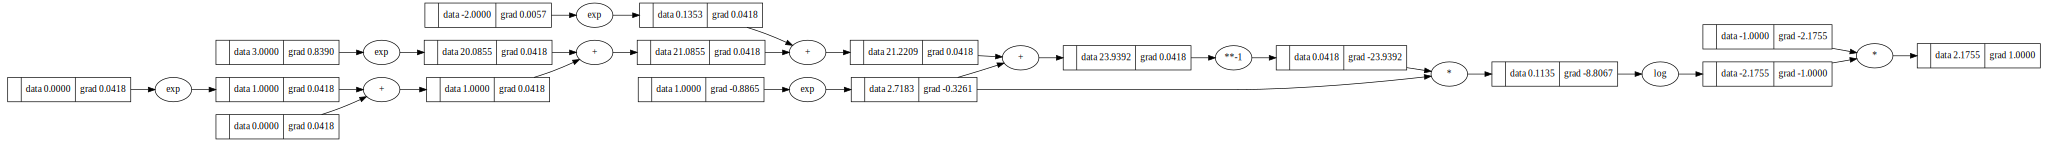

In [20]:
# Value class starter code, with many functions taken out
from math import exp, log
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  

  def __rmul__(self, other):
    return self * other

  def __truediv__(self, other):
    return self * other**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other): 
    return self + (-other)

  def __radd__(self, other): 
    return self + other

  
  def log(self):
    out = Value(log(self.data), (self,), 'log')
    def _backward():

      self.grad += (self.data**-1) * out.grad
    out._backward = _backward
    return out
  
  def exp(self):
    out = Value(exp(self.data), (self,), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int / float powers"
    x = self.data
    out = Value(self.data ** (other), (self, ), f"**{other}")

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad

    out._backward = _backward
    return out
  
  def backward(self): # exactly as in video  
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  # denominator = 23.9392
  out = [(c / denominator) for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")

draw_dot(loss)

In [18]:
x = torch.Tensor([0.0,3.0, -2.0, 1.0]) ; x.requires_grad = True
x_exp = torch.exp(x)
x_exp_sum = torch.sum(x_exp)
x_prob =  x_exp/x_exp_sum
print(x_exp_sum)

loss = -x_prob[3].log()
loss.backward()
print(loss)
print('---')
print('x', x.grad)


tensor(23.9392, grad_fn=<SumBackward0>)
tensor(2.1755, grad_fn=<NegBackward0>)
---
x tensor([ 0.0418,  0.8390,  0.0057, -0.8865])
